In [205]:
# Pull prices of crypto picks from different exchanges, prompt user to buy from that exchange to get the best deal.

#Will select the best exchange

# if asset A on exchangeA > exchangeB
    #print(select a)
# elif exhange b > exchange a
    #print(select b)
 # else 
    #print(still looking)

#######################################################   

# ccxt buy orders

In [206]:
#import libraries
from dotenv import load_dotenv
from tradingview_ta import TA_Handler, Interval, Exchange
import datetime
import os
import logging
import pandas as pd
from pathlib import Path
%matplotlib inline

DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [207]:
#Create TradingView variable and activate env variables
from tvDatafeed import TvDatafeed,Interval
load_dotenv()
tradev_id = os.getenv("username")
tradev_secret_key = os.getenv("password")

In [208]:
#Log into TradingView
logging.basicConfig(level=logging.DEBUG)
tv = TvDatafeed(
    tradev_id,
    tradev_secret_key,
    chromedriver_path=None
)

In [209]:
# -Pull Assets per Exchange from tradingview (tradingview, api3)

crypto_one = input("enter the ticker of your first choice:")
crypto_two = input("enter the ticker of your second choice:")
exchangeA = input("enter the exchange of your choice:")
exchangeB = input("enter the exchange of your choice:")


print(f"Thank You! Lets get started!")

crypto_one_df = tv.get_hist(symbol=crypto_one,exchange=exchange1,interval=Interval.in_daily,n_bars=500)
crypto_two_df = tv.get_hist(symbol=crypto_two,exchange=exchange2,interval=Interval.in_daily,n_bars=500)
crypto_one_df.tail(), crypto_two_df.tail()


DEBUG:root:creating websocket connection


Thank You! Lets get started!


DEBUG:tvDatafeed.main:getting data for Coinbase:COMPUSD...
DEBUG:root:creating websocket connection
DEBUG:tvDatafeed.main:getting data for Binance:ETHUSD...


(                               symbol    open    high     low   close  \
 datetime                                                                
 2021-09-17 19:00:00  Coinbase:COMPUSD  400.77  416.00  392.40  401.32   
 2021-09-18 19:00:00  Coinbase:COMPUSD  401.40  402.59  384.17  393.24   
 2021-09-19 19:00:00  Coinbase:COMPUSD  393.26  394.12  332.36  337.76   
 2021-09-20 19:00:00  Coinbase:COMPUSD  337.86  350.28  302.80  312.66   
 2021-09-21 19:00:00  Coinbase:COMPUSD  312.66  330.14  305.66  326.75   
 
                           volume  
 datetime                          
 2021-09-17 19:00:00  12765.35434  
 2021-09-18 19:00:00  11848.71523  
 2021-09-19 19:00:00  36709.50540  
 2021-09-20 19:00:00  26605.34032  
 2021-09-21 19:00:00   3810.38200  ,
                              symbol         open         high          low  \
 datetime                                                                     
 2021-09-17 19:00:00  Binance:ETHUSD  3398.890690  3551.398663  3322.

lets see how your selections have performed these last few months.:


(<AxesSubplot:xlabel='datetime'>,)

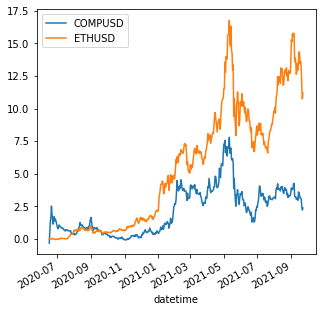

In [210]:
# -Present value and Daily Returns of the assets (pds1, api2
print(f'lets see how your selections have performed these last few months.:')
return_df = pd.DataFrame()
#Calculate returns
crypto_one_daily_returns = crypto_one_df['close'].pct_change().dropna()
crypto_two_daily_returns = crypto_two_df['close'].pct_change().dropna()
#Create a column in empty dataframe with return data
return_df[crypto_one] = crypto_one_daily_returns
return_df[crypto_two] = crypto_two_daily_returns

cumulative_returns = (1 + return_df).cumprod() -1
cumulative_returns.plot(figsize=(5,5)), 

In [211]:
if return_df is crypto_one > crypto_two:
    print(f"{crypto_one}, has upside")
elif return_df is crypto_two > crypto_one:
    print(f"{crypto_two}, has upside")
else:
    print('new')

new


In [212]:
#coinbase
#link_coinbase = tv.get_hist(
#    symbol='LINKUSD',
#    exchange='COINBASE',
#    interval=Interval.in_daily,
#    n_bars=500
#)

#aave_coinbase = tv.get_hist(
#   symbol='LINKUSD',
#    exchange='COINBASE',
#   interval=Interval.in_daily,
#    n_bars=500
#)

#comp_coinbase = tv.get_hist(
#    symbol='COMPUSD',
#    exchange='COINBASE',
#    interval=Interval.in_daily,
#    n_bars=500
#)


#kraken
#link_kraken = tv.get_hist(
 #   symbol='LINKUSD',
  #  exchange='KRAKEN',
   # interval=Interval.in_daily,
    #n_bars=500
#)

#aave_kraken = tv.get_hist(
 #   symbol='LINKUSD',
  #  exchange='KRAKEN',
   # interval=Interval.in_daily,
    #n_bars=500
#)

#comp_kraken = tv.get_hist(
 #   symbol='COMPUSD',
  #  exchange='KRAKEN',
 #   interval=Interval.in_daily,
#    n_bars=500
#)

#comp_coinbase.sort_index()


#coinbase = pd.concat([comp_coinbase, aave_coinbase, link_coinbase], axis='columns', join='inner')
#kraken = pd.concat([aave_kraken, link_kraken, comp_kraken], axis='columns', join='inner')

#coinbase.head()
#kraken.head()

In [214]:
import ccxt
import os 
import re
import time
import pandas as pd

from stockstats import StockDataFrame as Sdf

# configure exchange
exchange = getattr(ccxt, exchangeA)({
  #'apiKey': os.environ['APIKEY'],
  #'secret': os.environ['SECRET'],
  'timeout': 10000,
  'enableRateLimit': True
})

# load markets and all coin_pairs
exchange.load_markets()

coin_pairs = exchange.symbols
# list of coin pairs which are active and use BTC as base coin
valid_coin_pairs = []
# load only coin_pairs which match regex and are active
regex = '^.*/USD'

for coin_pair in coin_pairs:
  if re.match(regex, coin_pair) and exchange.markets[coin_pair]['active']:
    valid_coin_pairs.append(coin_pair)

DEBUG:ccxt.base.exchange:GET https://api.coinbase.com/v2/currencies, Request: {'CB-VERSION': '2018-05-30', 'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/62.0.3202.94 Safari/537.36', 'Accept-Encoding': 'gzip, deflate'} None
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): api.coinbase.com:443
DEBUG:urllib3.connectionpool:https://api.coinbase.com:443 "GET /v2/currencies HTTP/1.1" 200 None
DEBUG:ccxt.base.exchange:GET https://api.coinbase.com/v2/currencies, Response: 200 {'Date': 'Wed, 22 Sep 2021 03:03:37 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Cache-Control': 'max-age=86400, public, s-maxage=86400, ', 'Content-Disposition': 'attachment; filename=response.json', 'Content-Encoding': 'gzip', 'Content-Security-Policy': "default-src 'self' https://www.coinbase.com; child-src 'self' https://www.coinbase.com https://fast.wistia.net https://*.onli

In [215]:
from stockstats import StockDataFrame as Sdf

def get_historical_data(coin_pair, timeframe):
    """Get Historical data (ohlcv) from a coin_pair
    """
    # optional: exchange.fetch_ohlcv(coin_pair, '1h', since)
    data = exchangePick.fetchOHLCV(coin_pair, '1d', timeframe)
    # update timestamp to human readable timestamp
    data = [[exchange.iso8601(candle[0])] + candle[1:] for candle in data]
    header = ['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume']
    df = pd.DataFrame(data, columns=header)
    return df


def create_stock(historical_data):
    """Create StockData from historical data 
    """
    assets = Sdf.retype(historical_data)
    return assets


if __name__ == "__main__":
  ...
  for coin_pair in valid_coin_pairs:
    # respect rate limit
    time.sleep(exchange.rateLimit / 1000)
    data = get_historical_data(coin_pair, '1d')
    assets_data = create_asset(data)

    print(assets_data)

In [218]:

  # better way to do it
  ticker = exchange.fetch_ticker(coin_pair)
  day_volume = ticker["baseVolume"]
  print(day_volume)
  

DEBUG:ccxt.base.exchange:GET https://api.coinbase.com/v2/prices/ZRX-ZWL/buy, Request: {'CB-VERSION': '2018-05-30', 'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/62.0.3202.94 Safari/537.36', 'Accept-Encoding': 'gzip, deflate'} None
DEBUG:urllib3.connectionpool:https://api.coinbase.com:443 "GET /v2/prices/ZRX-ZWL/buy HTTP/1.1" 200 None
DEBUG:ccxt.base.exchange:GET https://api.coinbase.com/v2/prices/ZRX-ZWL/buy, Response: 200 {'Date': 'Wed, 22 Sep 2021 03:08:13 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Cache-Control': 'max-age=15, public, s-maxage=15, ', 'Content-Disposition': 'attachment; filename=response.json', 'Content-Encoding': 'gzip', 'Content-Security-Policy': "default-src 'self' https://www.coinbase.com; child-src 'self' https://www.coinbase.com https://fast.wistia.net https://*.online-metrix.net https://*.wpstn.com https://netverify.com https://pla

None


In [ ]:
#for i in range(1, len(signal)):
    # If the MACD crosses the signal line upward
#    if macd[i] > signal[i] and macd[i - 1] <= signal[i - 1]:
    #    advice.append("BUY")
#    # The other way around
#    elif macd[i] < signal[i] and macd[i - 1] >= signal[i - 1]:
    #    advice.append("SELL")
    # Do nothing if not crossed
#    else:
    #    advice.append("HOLD")

    #use To create buy/sell/hold